In [1]:
import re
import numpy as np
from scipy.spatial.distance import cosine
from scipy import linalg
import matplotlib.pyplot as plt 
%matplotlib  inline

In [2]:
filepath = 'sentences.txt'  
text = []
with open(filepath) as fp:
    for x in fp:
        text.append(x.strip().lower())

text_split = []
for i in text:
    p = re.compile(r'[^a-z]')
    text_split.append(p.split(i))

for el in text_split:
    i = 0
    length = len(el)  
    while(i<length):
        if(el[i]== ''):
            el.remove (el[i])
            length = length -1  
            continue
        i = i+1

output = {}
k = 0
for words in text_split:
    for word in words:
        if word not in output.values():
            output[k] = word
            k += 1 

In [3]:
def word_count(word, line):
    result = 0
    for w in line:
        if w == word:
            result = result + 1
    return result
matrix = np.zeros((len(text_split), len(output)))
for i in range(len(text_split)):
        for j in range(len(output)):
            matrix[i, j] = word_count(output[j], text_split[i])

In [4]:
dist = []
for i in range(1,len(text_split)):
    dist.append(cosine(matrix[0],matrix[i]))
print(dist.index(sorted(dist)[0])+1)
print(dist.index(sorted(dist)[1])+1)

6
4


In [5]:
def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)

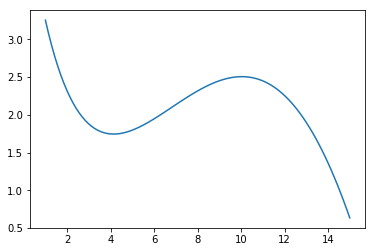

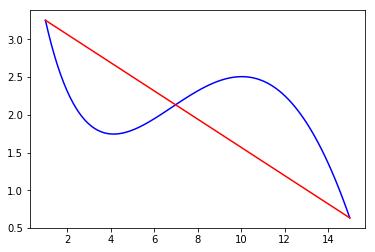

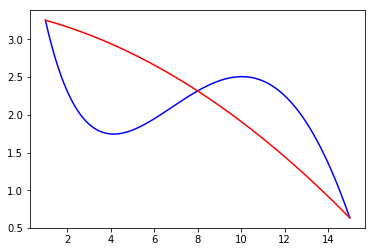

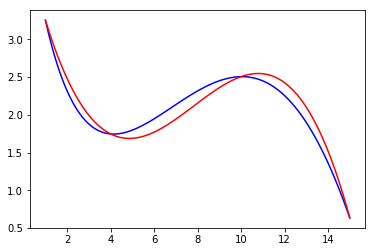

array([[ 4.36264154],
       [-1.29552587],
       [ 0.19333685],
       [-0.00823565]])

In [6]:
x = np.linspace(1,15,100)
y = f(x)
plt.plot(x,y)
plt.show()

a = np.array([[1,1],[1,15]])
b = np.array([[f(1)],[f(15)]])
w = np.linalg.solve(a,b)
plt.plot(x,y,'b')
plt.plot(x,w[0]+w[1]*x,'r')
plt.show()

a = np.array([[1,1,1],[1,8,64],[1,15,225]])
b = np.array([[f(1)],[f(8)],[f(15)]])
w = np.linalg.solve(a,b)
plt.plot(x,y,'b')
plt.plot(x,w[0]+w[1]*x+w[2]*x**2,'r')
plt.show()


a = np.array([[1,1,1,1],[1,4,16,64],[1,10,100,1000],[1,15,225,3375]])
b = np.array([[f(1)],[f(4)],[f(10)],[f(15)]])
w = np.linalg.solve(a,b)
plt.plot(x,y,'b')
plt.plot(x,w[0]+w[1]*x+w[2]*x**2+w[3]*x**3,'r')
plt.show()
w